# The Bias-Variance Trade Off

## Refresh

- Bias of an estimator $\hat{\theta}$ is defined as $Bias(\hat{\theta}) = E[\hat{\theta}] - \theta$
- Variance of an estimator $\hat{\theta}$ is defined as $\textrm{var}(\widehat{\theta})=E\left((\widehat{\theta}-E(\widehat{\theta}))^2\right)$
- Can derive $Var(X) = E[(X-E[X])^2)] = E[X^2] - (E[X])^2$ or in other words:
- $E[X^2] = Var(X) + (E[X])^2$ i.e variance + bias^2

## Math

- Let $\hat{f}(x)$ be our prediction for the response variable $Y$ given the input $x$
- The true relationship between $X$ and $Y$ is given by $Y = f(X) + \epsilon$ where we assume $\epsilon$ is the error term with $E(\epsilon) = 0$ and $Var(\epsilon) = \sigma^2$
- MSE of our prediction $\hat{f}(x)$ is defined as $\text{MSE}(x) = E[(Y-\hat{f}(x))^2]$
- Substitute $Y = f(X) + \epsilon$ into the MSE formula above we can get:
  - $\text{MSE}(x) = E[(f(X) + \epsilon-\hat{f}(x))^2]$
- Expanding it, we can get:
  - $\text{MSE}(x) = E[(f(x) - \hat{f}(x))^2 + 2(f(x) - \hat{f}(x))\epsilon + \epsilon^2]$
  - Using Linearity of Expectation, we can get:
  - $E[2(f(x) - \hat{f}(x))\epsilon] = 2 E[(f(x) - \hat{f}(x))] E[\epsilon] = 2(f(x) - \hat{f}(x)) \cdot 0 = 0$
  - So $\text{MSE}(x) = E[(f(x) - \hat{f}(x))^2] + E[\epsilon^2]$
- Since $E[\epsilon^2] = \text{Var}(\epsilon) = \sigma^2$, so $\text{MSE}(x) = E[(f(x) - \hat{f}(x))^2] + \sigma^2$
- Now let's decompose $E[(f(x) - \hat{f}(x))^2]$
    - $E[(f(x) - \hat{f}(x))^2] = (\text{Bias}[\hat{f}(x)])^2 + \text{Var}[\hat{f}(x)]$
- In the end, we can derive that the **expected test MSE of some observation $x$** is the sum of **variance of the predicted response** for the test observation $x$ and the **squared bias** and the **variance of the error term**

## Live Coding

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(scale=0.5, size=X.shape[0])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In general, we can model the y as an **h-th** degree polynomial by polynomial regression model: 
$$
Y=\beta _{0}+\beta _{1}X +\beta_{2}X^{2}+\ldots+\beta_{h}X^{h}+\epsilon
$$

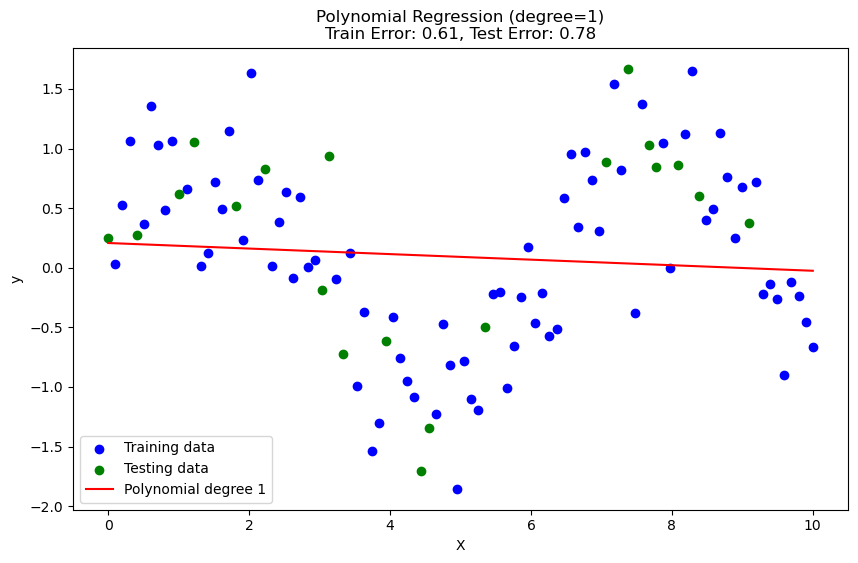

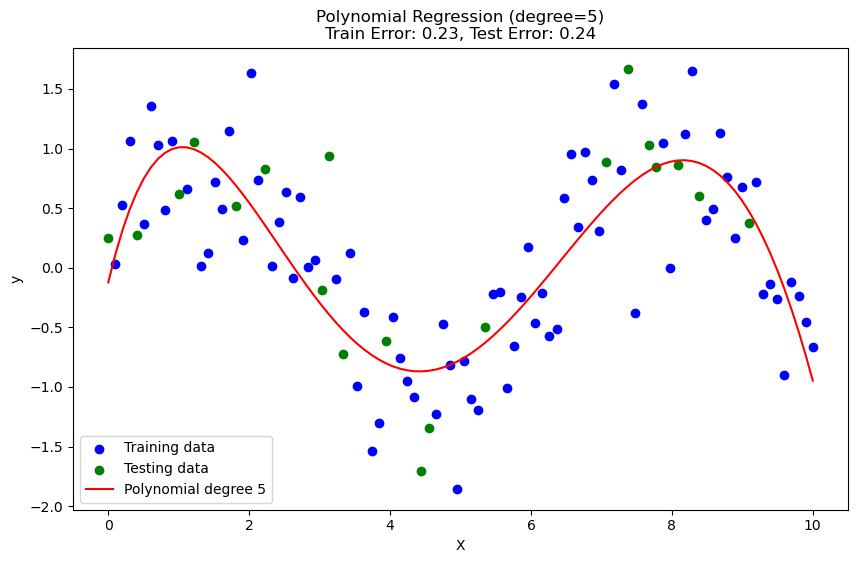

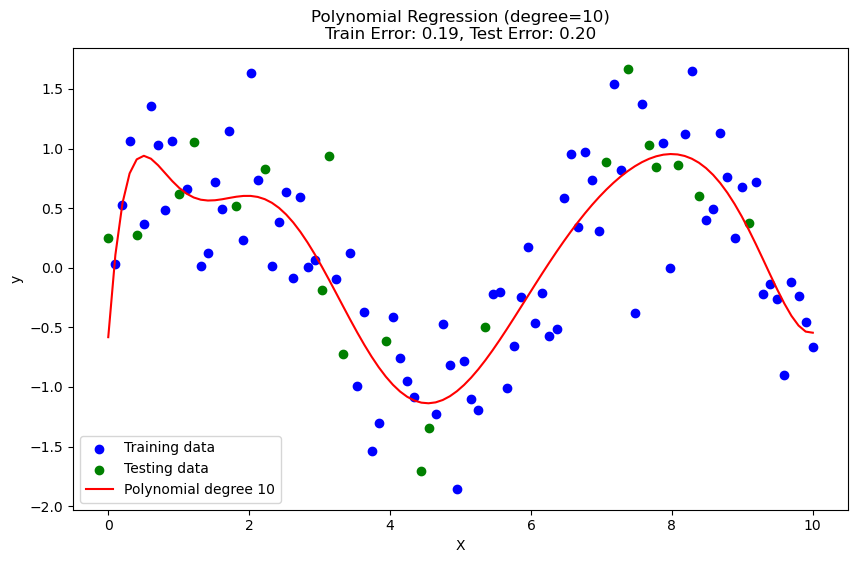

In [2]:
# Function to fit and plot polynomial regression
def plot_polynomial_regression(degree):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.scatter(X_test, y_test, color='green', label='Testing data')
    X_range = np.linspace(0, 10, 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)
    plt.plot(X_range, y_range_pred, color='red', label=f'Polynomial degree {degree}')
    plt.title(f'Polynomial Regression (degree={degree})\nTrain Error: {train_error:.2f}, Test Error: {test_error:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

    return train_error, test_error

# Fit and plot models with varying degrees of polynomial features
degrees = [1, 5, 10]
train_errors = []
test_errors = []

for degree in degrees:
    train_error, test_error = plot_polynomial_regression(degree)
    train_errors.append(train_error)
    test_errors.append(test_error)


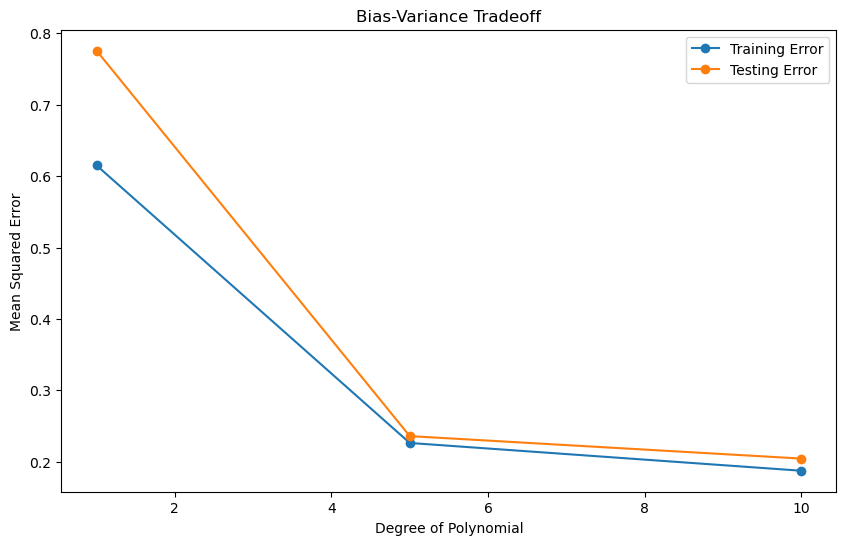

In [3]:
# Plot training and test errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Testing Error', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()

- Low Degree (e.g., 1): The model is too simple (high bias) -> underfitting
- Moderate Degree (e.g., 5): The model complexity is balanced -> good fit
- High Degree (e.g., 10): The model is too complex (high variance), fitting the noise in the training data -> overfitting

## Additional Materials
1. Variable Selection in Linear Regression
The task of determining which predictors are associated with the response, in order to ft a single model involving only those predictors, is referred to as **variable selection**. The variable selection variable
selection problem is studied extensively in Chapter 6, [ISLP book](https://www.statlearning.com/)
2. Assumptions in Linear Regression
There are four assumptions associated with a linear regression model:

- Linearity: The relationship between X and the mean of Y is linear.
- Homoscedasticity: The variance of residual is the same for any value of X.
- Independence: Observations are independent of each other. (you can use [Chi-Squared Test](https://www.jmp.com/en_au/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html) to test the independence)
- Normality: For any fixed value of X, Y is normally distributed.


